<a href="https://colab.research.google.com/github/SeungYeon2000/pytorch/blob/main/Py_Chap_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Contents
 1. label an image according to its content
 2. fabricate a new image from a real image
 3. describe the content of an image using proper English sentences




# 2.1   A pretrained network that recognizes the subject of an image
* Image Dataset <- from academic competitions
 1. image classification
 2. object localization
 3. object detection
 4. scene classification
 5. scene parsing (문법적 구성/구문 분석하는 과정)

# The inference process

 input image -> instance of the 다차원배열 class torch.Tensor. (RGB image with height&width, three dimensions) -> pretrained network to obtain scores for each class -> highest score corresponds to the most likely class according to weights -> each class is mapped one-to-one onto a class label -> output은 100개 element와 함께 torch.Tensor에 포함됨


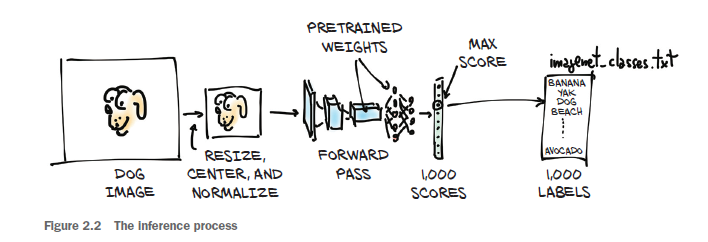

# 2.1.1 Obtaining a pretrained network for image recognition

load up and run two networks(Alexnet,ResNet)

In [6]:
# In[2] :
from torchvision import models
# In [2] :
dir(models)
 # 대문자 : popular models의 숫자를 시행하는 classes
 # 소문자 : 그 classes에서 예시된 모델을 반환하는 convenience functions
 # resnet101 = 101개 layers 가 있는 ResNet 반환

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

# 2.1.2 AlexNet

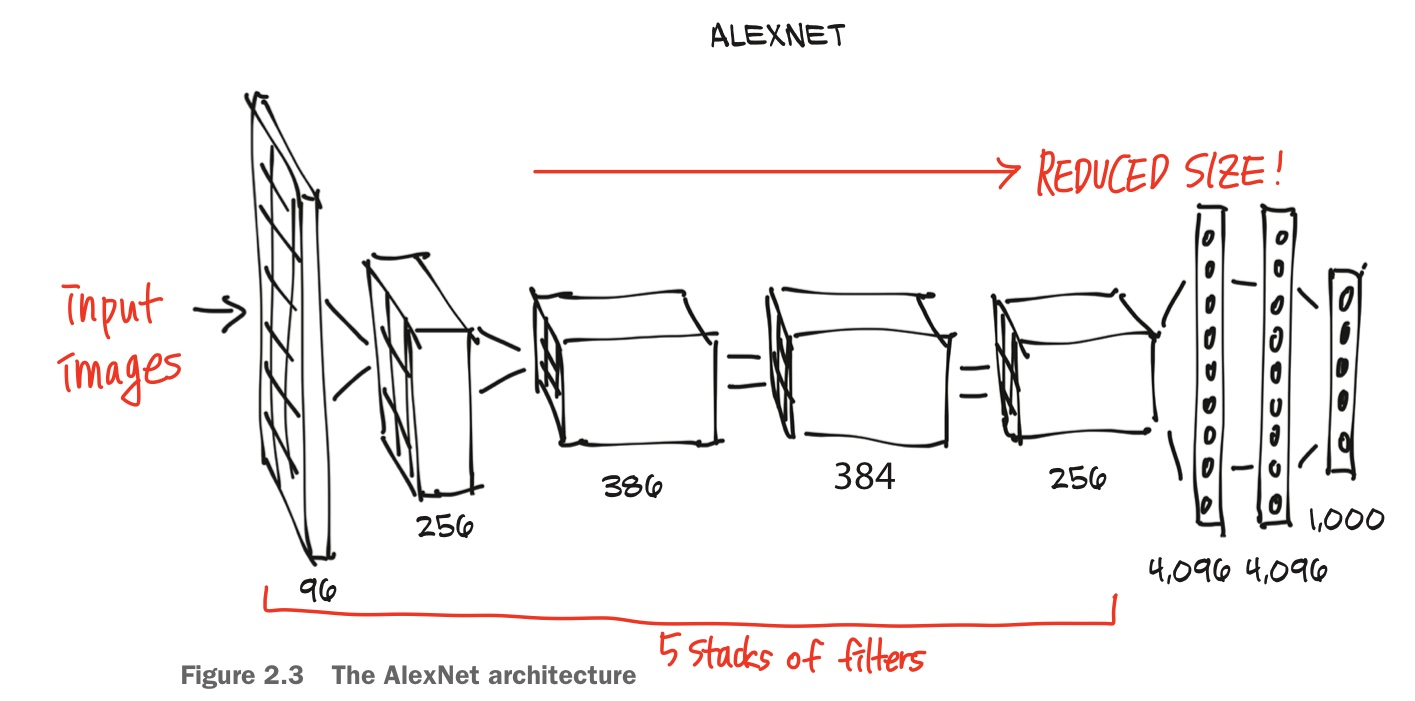
초기화 필수!

대문자 : computer vision에 익숙한 architecture 수행하는 class에 대응
소문자 : 미리 정해진 layers의 수나 단위를 설명, 선택적으로 다운하거나 미리 훈련된 weights를 layer에 로드함

# 2.1.3 ResNet

resnet101 function = 101개의 중첩된 layers neural network
2015년 이후 ResNet이 생겨나며 많은 중첩이 가능해짐

In [7]:
#In[4] :
resnet = models.resnet101 (pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [8]:
#In[5] :
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
#In[6] :
from torchvision import transforms
preprocess = transforms.Compose({
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
})


In [17]:
#In[7]:
from PIL import Image
img = Image.open("/content/bobby.jpg")

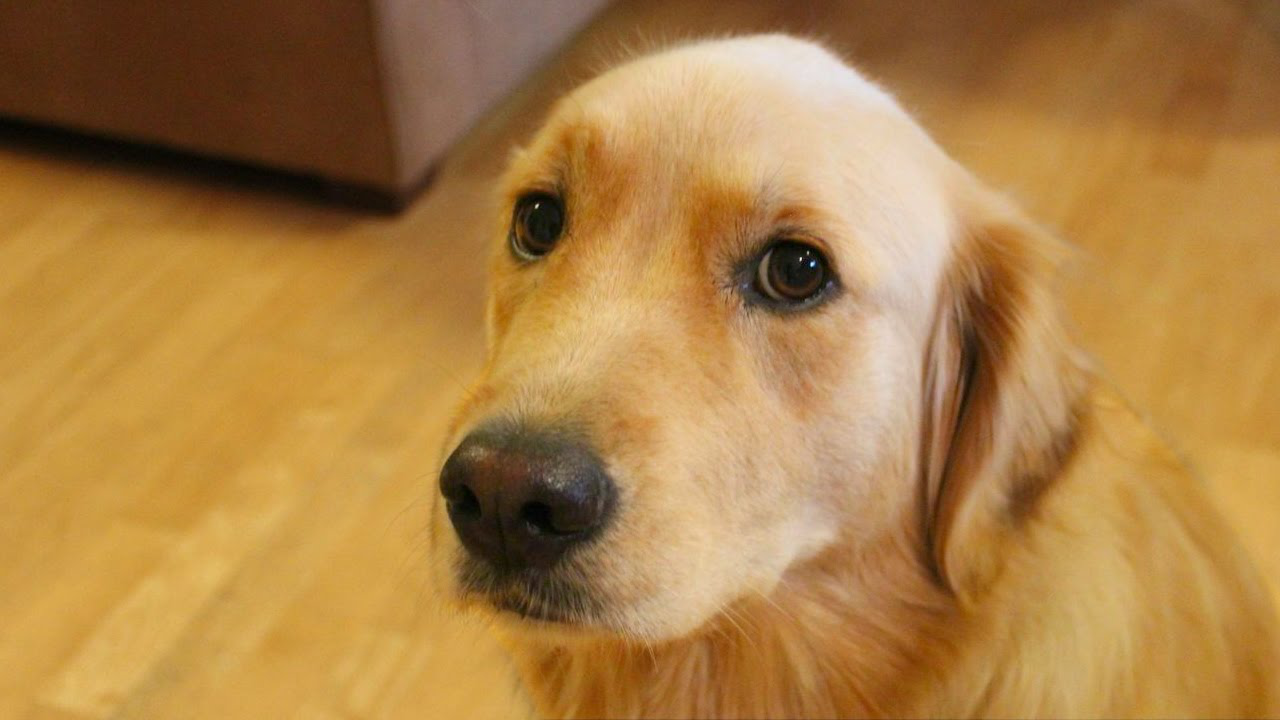

In [18]:
#In[8] :
img

In [19]:
img.show()

In [21]:
#In[9] :
img_t = preprocess(img)

In [22]:
#In[10] :
import torch
batch_t = torch.unsqueeze(img_t,0)

In [23]:
#In[11] :
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
#In[12] :
out = resnet(batch_t)
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5183e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [26]:
#In[13]:
with open('/content/imagenet.txt') as f:
  labels=[line.strip() for line in f.readlines()]

In [29]:
#In[14]:
_,index = torch.max(out,1)

# _, 가 머선 뜻인지(있어도 없어도 되는데 책에 굳이 붙여져있어서)

In [30]:
#In[15] :
percentage = torch.nn.functional.softmax(out,dim=1)[0]*100 
labels[index[0]],percentage[index[0]].item()

('golden retriever', 96.29335021972656)

torch.nn.functional.softmax() -> [0,1] 사이로 결과 normalize함 (합에 의해 나누어짐)


torch.sort(out,descending=True) -> 점수를 가능성 있는 순서대로 나열, 가능성 있는 단어와 확률이 뜸

In [31]:
#In[16]:
_, indices = torch.sort(out,descending=True)
[(labels[idx],percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.8081188201904297),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2826734781265259),
 ('redbone', 0.2086300402879715),
 ('tennis ball', 0.11621593683958054)]

성공적인 network -> training set에서 얼마나 잘 표현되어있는지에 달림

# 2.2.1  The Gan game
gan : generative adversarial network

generative :  sth is being created
adversarial : two networks are competing to outsmart the other
network
generator network : painter의 역할, 실제 같은 이미지 만듦(임의 input에서)
discriminator network : 도덕관념이 없는 예술 감정가, 진짜/가짜 감정함
각 네트워크의 결과에 의해 기반해 network training이 이루어짐, 각 network의 척도의 최적화로 이끈다.


# 2.2.2 CycleGAN
gangame의 진화 버전 : CycleGAN
**training set에서 matching pairs를 명시적으로 제공할 필요 없이** 이미지를 다른 영역으로 바꿀 수 있다.

generator는 무엇이 무엇인지에 대한 감독 없이장면에서 물체의 외관을 어떻게 선택적으로 바꾸는지를 배움.

다른 유사 물체의(이 경우에는 동물) 해부학에서 가져온 데이터로 해석할 수 있음.

# 2.2.3 A pretrained network that describes scenes

미리훈련된 이미지 captioning 모델 이용 - 영어로 caption남김

captioning
1.   장면의 "설명적인" 표현
2.   recurrent : 1의 결과가 input으로 들어와서 여러 "설명"을 일관성 있는 문장으로 만듦.

